### Data analysis 

In [271]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np 
from sklearn.preprocessing import LabelEncoder

train_df = pd.read_csv('data/train.csv') 
test_df = pd.read_csv('data/test.csv')

In [272]:
train_df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [273]:
train_df.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


From the describe(), some outliers can be identified in some columns. I will keep these columns with outliers in mind to plot and process them in the future.          
Also some data are missing, I will have a look how drastic this is.

In [274]:
columns_with_outliers = ['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']

train_df.isnull().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

Encode columns different ways.

In [275]:
# Encode
label_encoder = LabelEncoder()
train_df['HomePlanet'] = label_encoder.fit_transform(train_df['HomePlanet'])
train_df['CryoSleep'] = label_encoder.fit_transform(train_df['CryoSleep'])
train_df['VIP'] = label_encoder.fit_transform(train_df['VIP'])
train_df['Transported'] = label_encoder.fit_transform(train_df['Transported'])

Look at the most common value, then look at the plots.

In [276]:
train_df['HomePlanet'].value_counts()

HomePlanet
0    4602
1    2131
2    1759
3     201
Name: count, dtype: int64

In [277]:
train_df['CryoSleep'].value_counts()

CryoSleep
0    5439
1    3037
2     217
Name: count, dtype: int64

In [278]:
train_df['VIP'].value_counts()

VIP
0    8291
2     203
1     199
Name: count, dtype: int64

In [279]:
# Manage missing values for the categorical columns 
train_df['HomePlanet'].replace(3, 1, inplace=True)
train_df['CryoSleep'].replace(2, 0, inplace=True)
train_df['VIP'].replace(2, 0, inplace=True)

In [280]:
# One-hot encode HomePlanet column 
encoded_df = pd.get_dummies(train_df['HomePlanet'], prefix='Planet')
train_df = pd.concat([train_df, encoded_df], axis = 1)

train_df['HomePlanet'].value_counts()

HomePlanet
0    4602
1    2332
2    1759
Name: count, dtype: int64

/var/folders/h5/drrwf_210j77_324_tn_rck00000gn/T/ipykernel_87134/1693088062.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='HomePlanet', y='Transported', data=transport_rate, palette='viridis')


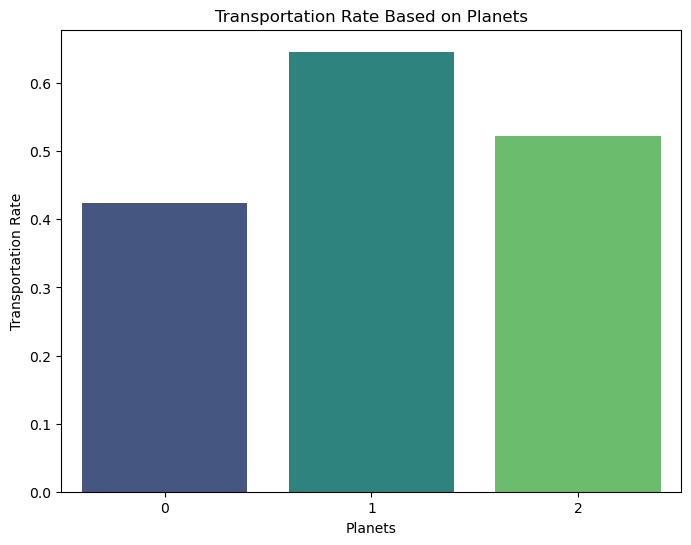

In [281]:
# Calculate the transport rate for each planet
transport_rate = train_df.groupby('HomePlanet')['Transported'].mean().reset_index()

# Plot the bar plot showing transport rate
plt.figure(figsize=(8, 6))
sns.barplot(x='HomePlanet', y='Transported', data=transport_rate, palette='viridis')
plt.title('Transportation Rate Based on Planets')
plt.xlabel('Planets')
plt.ylabel('Transportation Rate')
plt.show()

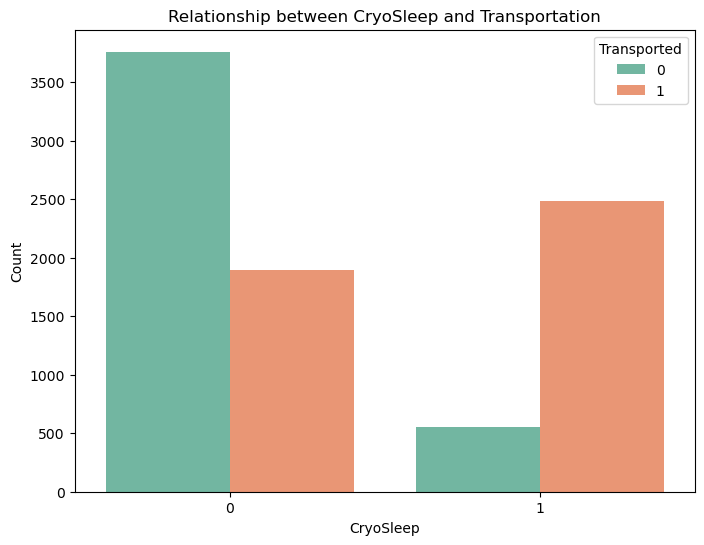

In [282]:
# Plot a count plot to show the relationship between 'CryoSleep' and 'Transported'
plt.figure(figsize=(8, 6))
sns.countplot(x='CryoSleep', hue='Transported', data=train_df, palette='Set2')
plt.title('Relationship between CryoSleep and Transportation')
plt.xlabel('CryoSleep')
plt.ylabel('Count')
plt.show()

Passengers who were elected to be 
put into suspended animation had much worse thansportation rate. 

/var/folders/h5/drrwf_210j77_324_tn_rck00000gn/T/ipykernel_87134/3345289150.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x=train_df[column], legend=False, palette='viridis')


<Figure size 2000x1000 with 0 Axes>

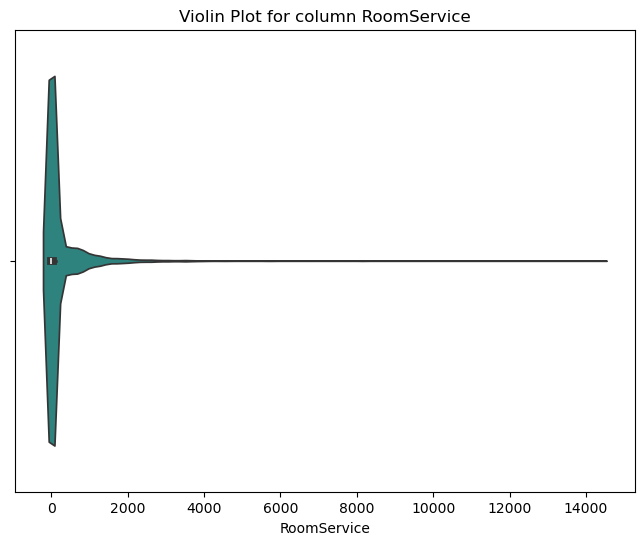

/var/folders/h5/drrwf_210j77_324_tn_rck00000gn/T/ipykernel_87134/3345289150.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x=train_df[column], legend=False, palette='viridis')


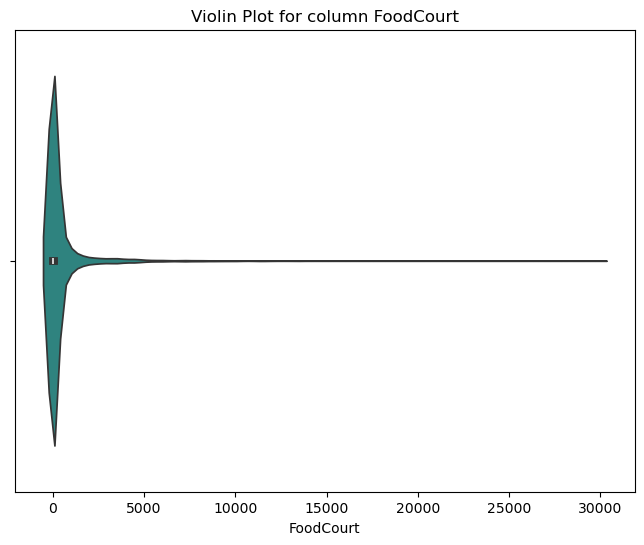

/var/folders/h5/drrwf_210j77_324_tn_rck00000gn/T/ipykernel_87134/3345289150.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x=train_df[column], legend=False, palette='viridis')


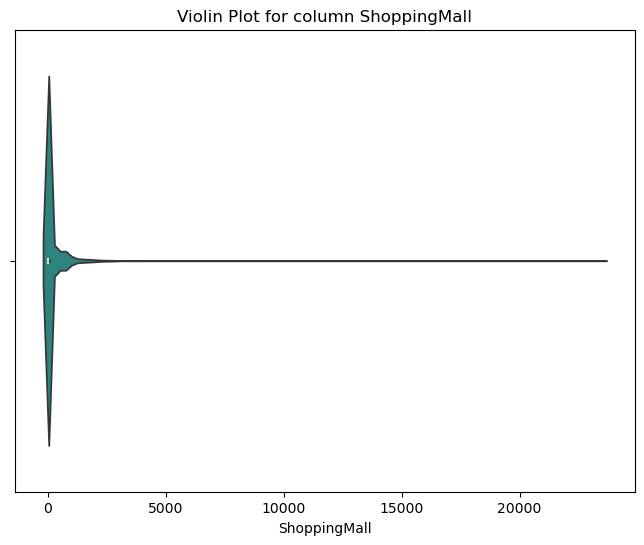

/var/folders/h5/drrwf_210j77_324_tn_rck00000gn/T/ipykernel_87134/3345289150.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x=train_df[column], legend=False, palette='viridis')


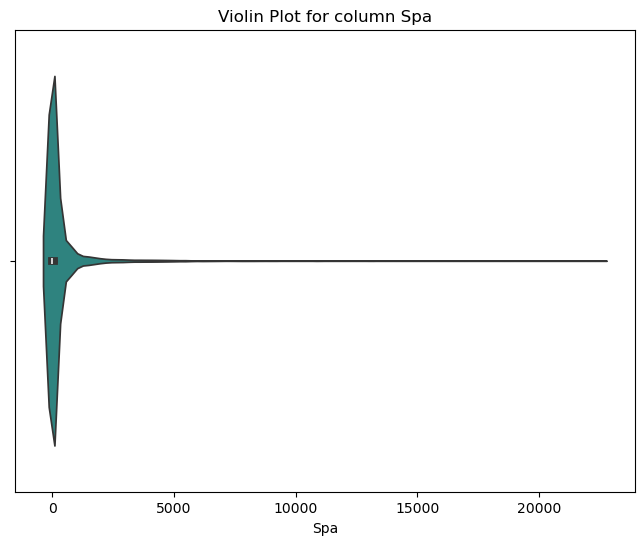

/var/folders/h5/drrwf_210j77_324_tn_rck00000gn/T/ipykernel_87134/3345289150.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x=train_df[column], legend=False, palette='viridis')


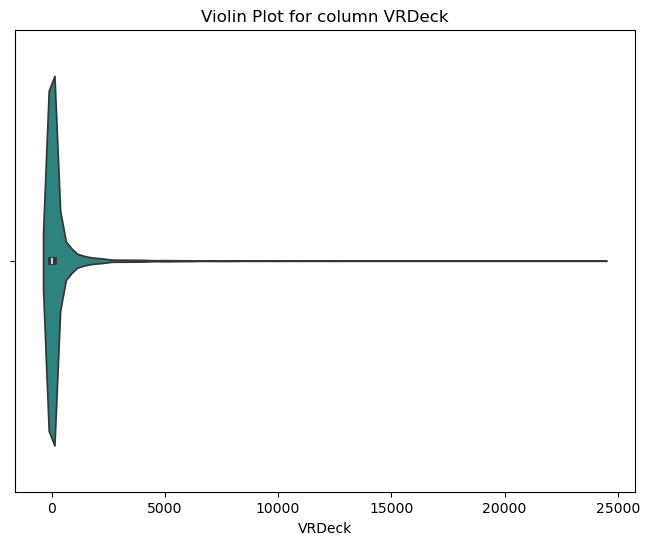

In [283]:
plt.figure(figsize = (20, 10))

for column in columns_with_outliers: 
    # Plot a violin plot to show the distribution 
    plt.figure(figsize=(8, 6))
    sns.violinplot(x=train_df[column], legend=False, palette='viridis')
    plt.title('Violin Plot for column ' + column)
    plt.xlabel(column)
    plt.show()

### Managing outliers 

In [284]:
def manage_outilers(column, outlier_value=1000):
    # Get the mean for non-outlier values to replace 
    mean = train_df[train_df[column] < outlier_value][column].mean()
    # Get the number of outliers 
    print(train_df[train_df[column] < outlier_value][column].count())
    train_df.loc[train_df[column] > outlier_value, column] = mean

manage_outilers('RoomService', 1500)
manage_outilers('FoodCourt', 2500)
manage_outilers('ShoppingMall', 1500)
manage_outilers('Spa', 2500)
manage_outilers('VRDeck', 2500)

8175
8050
8262
8233
8262


In [289]:
train_df.describe()

,HomePlanet,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
count,8693.000000,8693.000000,8514.000000,8693.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000,8693.000000
mean,0.672955,0.349362,28.827930,0.022892,119.617982,153.001615,103.958000,143.517673,145.510772,0.503624
std,0.790476,0.476796,14.489021,0.149568,280.560699,384.552442,253.668854,362.571598,373.723539,0.500016
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,1.000000,1.000000,38.000000,0.000000,47.000000,76.000000,27.000000,59.000000,46.000000,1.000000
max,2.000000,1.000000,79.000000,1.000000,1489.000000,2492.000000,1487.000000,2463.000000,2491.000000,1.000000
